In [ ]:
## New code written on 15-Jan-2022

## Major changes:

### 5-fold cv
### No Naive Bayes
### Other metrics included

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
from matplotlib import rcParams
sns.set_style("white")
sns.set_style("ticks")

In [2]:
fontsize_xylabels = 30
fontsize_ticks = 25
s_size = 200

In [3]:
sns.set_context("poster", rc={"axes.labelsize":22}, font_scale=0.75)

In [4]:
files = np.load('dream_data_network1_reg_v2.npz', allow_pickle=True)

In [ ]:
#print(files.files)

In [5]:
AUROC_corr = files['AUROC_corr'].mean(axis=1)
AUROC_rf = files['AUROC_rf'].mean(axis=1)
AUROC_ridge = files['AUROC_ridge'].mean(axis=1)
AUROC_svm = files['AUROC_svm'].mean(axis=1)

In [6]:
SCORES_rf = files['SCORES_rf'].mean(axis=1)
SCORES_ridge = files['SCORES_ridge'].mean(axis=1)
SCORES_svm = files['SCORES_svm'].mean(axis=1)
SCORES_nb = files['SCORES_nb'].mean(axis=1)

In [7]:
p_vals = np.diag(files['p_vals'].mean(axis=2))
idx = files['idx']
zero_class = np.delete(files['zero_class'].mean(axis=1), idx,0)
true_targets = np.delete(files['true_targets1'], idx, 0)

In [8]:
SCORES_rf = np.delete(SCORES_rf, idx, 0)
SCORES_ridge = np.delete(SCORES_ridge, idx, 0)
SCORES_svm = np.delete(SCORES_svm, idx, 0)
SCORES_nb = np.delete(SCORES_nb, idx, 0)

In [9]:
AUROC_corr = np.delete(AUROC_corr, idx, 0)
AUROC_rf = np.delete(AUROC_rf, idx, 0)
AUROC_ridge = np.delete(AUROC_ridge, idx, 0)
AUROC_svm = np.delete(AUROC_svm, idx, 0)

In [10]:
B = np.ones(p_vals.shape[0], dtype=bool)
B[idx] = False

p_new = p_vals[B]

In [11]:
def setBoxColors(bp):
    plt.setp(bp['boxes'][0], color='tab:blue', linewidth=3)
    plt.setp(bp['caps'][0], color='tab:blue', linewidth=3)
    plt.setp(bp['caps'][1], color='tab:blue', linewidth=3)
    plt.setp(bp['whiskers'][0], color='tab:blue', linewidth=3,linestyle=':')
    plt.setp(bp['whiskers'][1], color='tab:blue', linewidth=3, linestyle=':')
    plt.setp(bp['medians'][0], color='tab:blue', linewidth=3)

    plt.setp(bp['boxes'][1], color='tab:red', linewidth=3)
    plt.setp(bp['caps'][2], color='tab:red', linewidth=3)
    plt.setp(bp['caps'][3], color='tab:red', linewidth=3)
    plt.setp(bp['whiskers'][2], color='tab:red', linewidth=3, linestyle=':')
    plt.setp(bp['whiskers'][3], color='tab:red', linewidth=3, linestyle=':')
    plt.setp(bp['medians'][1], color='tab:red', linewidth=3)

# RMSE distributions across methods

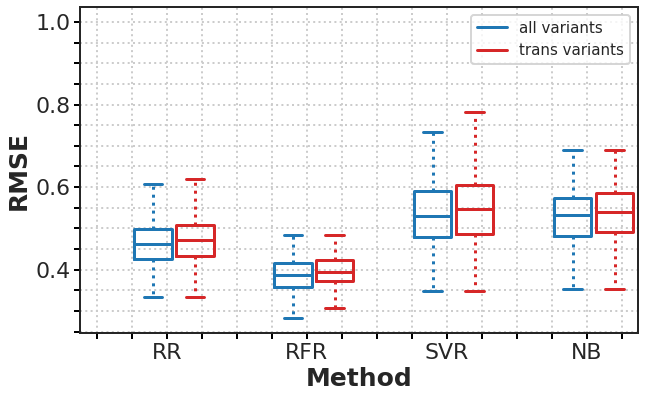

In [12]:
A = [list(SCORES_ridge), list(SCORES_ridge[p_new>(1/750)])]
B = [list(SCORES_rf), list(SCORES_rf[p_new>(1/750)])]
C = [list(SCORES_svm), list(SCORES_svm[p_new>(1/750)])]
D = [list(SCORES_nb), list(SCORES_nb[p_new>(1/750)])]

fig, ax = plt.subplots(figsize=(10,6))

bp = ax.boxplot(A, positions = [1, 1.9], widths = 0.8, showfliers=False)
setBoxColors(bp)

bp = ax.boxplot(B, positions = [4, 4.9], widths = 0.8, showfliers=False)
setBoxColors(bp)

bp = ax.boxplot(C, positions = [7, 7.9], widths = 0.8, showfliers=False)
setBoxColors(bp)

bp = ax.boxplot(D, positions = [10, 10.9], widths = 0.8, showfliers=False)
setBoxColors(bp)

ax.set_xticklabels(['RR', 'RFR', 'SVR', 'NB'])
ax.set_xticks([1.3, 4.3, 7.3, 10.3])

ax.set_xlabel('Method', fontsize=fontsize_xylabels-5, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=fontsize_xylabels-5, fontweight='bold')

ax.tick_params(labelsize=fontsize_ticks-3)
ax.tick_params(which='both', width=2, length = 6, color='black' )

ax.grid(True, linestyle=':', which='both')
ax.minorticks_on()

hB, = plt.plot([1,1], color='tab:blue', linestyle='-', linewidth=3)
hR, = plt.plot([1,1], color='tab:red', linestyle='-', linewidth=3)
plt.legend((hB, hR),('all variants', 'trans variants'), fontsize=15)

hB.set_visible(False)
hR.set_visible(False)

ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

#plt.savefig('new_figs/boxplot_rmse.png')

# RMSE values of RFR, SVR, and NB vs RR

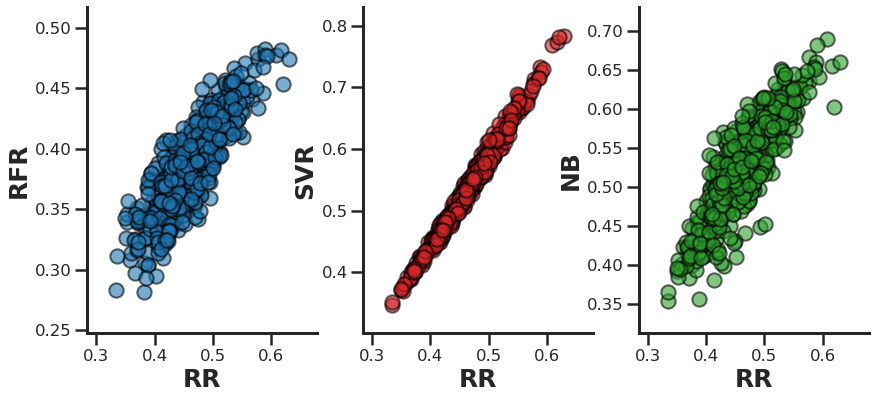

In [13]:
fig, axs = plt.subplots(1,3, figsize=(14,6))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.scatter(SCORES_ridge, SCORES_rf, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_xlabel('RR', fontsize=fontsize_xylabels-5, fontweight='bold')
ax1.set_ylabel('RFR', fontsize=fontsize_xylabels-5, fontweight='bold')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)

ax2.scatter(SCORES_ridge, SCORES_svm, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_xlabel('RR', fontsize=fontsize_xylabels-5, fontweight='bold')
ax2.set_ylabel('SVR', fontsize=fontsize_xylabels-5, fontweight='bold')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)

ax3.scatter(SCORES_ridge, SCORES_nb, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_xlabel('RR', fontsize=fontsize_xylabels-5, fontweight='bold')
ax3.set_ylabel('NB', fontsize=fontsize_xylabels-5, fontweight='bold')

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(3)
ax3.spines['left'].set_linewidth(3)

#plt.savefig('new_figs/scatter_rmse.png')

# AUROC distributions across methods

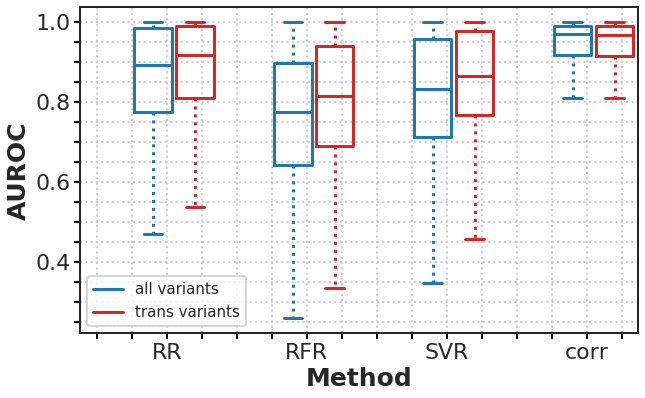

In [15]:
A = [list(AUROC_ridge), list(AUROC_ridge[p_new>(1/750)])]
B = [list(AUROC_rf), list(AUROC_rf[p_new>(1/750)])]
C = [list(AUROC_svm), list(AUROC_svm[p_new>(1/750)])]
D = [list(AUROC_corr), list(AUROC_corr[p_new>(1/750)])]

fig, ax = plt.subplots(figsize=(10,6))

bp = ax.boxplot(A, positions = [1, 1.9], widths = 0.8, showfliers=False)
setBoxColors(bp)

bp = ax.boxplot(B, positions = [4, 4.9], widths = 0.8, showfliers=False)
setBoxColors(bp)

bp = ax.boxplot(C, positions = [7, 7.9], widths = 0.8, showfliers=False)
setBoxColors(bp)

bp = ax.boxplot(D, positions = [10, 10.9], widths = 0.8, showfliers=False)
setBoxColors(bp)

ax.set_xticklabels(['RR', 'RFR', 'SVR', 'corr'])
ax.set_xticks([1.3, 4.3, 7.3, 10.3])

ax.set_xlabel('Method', fontsize=fontsize_xylabels-5, fontweight='bold')
ax.set_ylabel('AUROC', fontsize=fontsize_xylabels-5, fontweight='bold')

ax.tick_params(labelsize=fontsize_ticks-3)
ax.tick_params(which='both', width=2, length = 6, color='black' )

ax.grid(True, linestyle=':', which='both')
ax.minorticks_on()

hB, = plt.plot([1,1], color='tab:blue', linestyle='-', linewidth=3)
hR, = plt.plot([1,1], color='tab:red', linestyle='-', linewidth=3)
plt.legend((hB, hR),('all variants', 'trans variants'), fontsize=15)

hB.set_visible(False)
hR.set_visible(False)

ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

#plt.savefig('new_figs/boxplot_auroc.png')

# AUROC values of RFR, SVR, and Corr vs RR

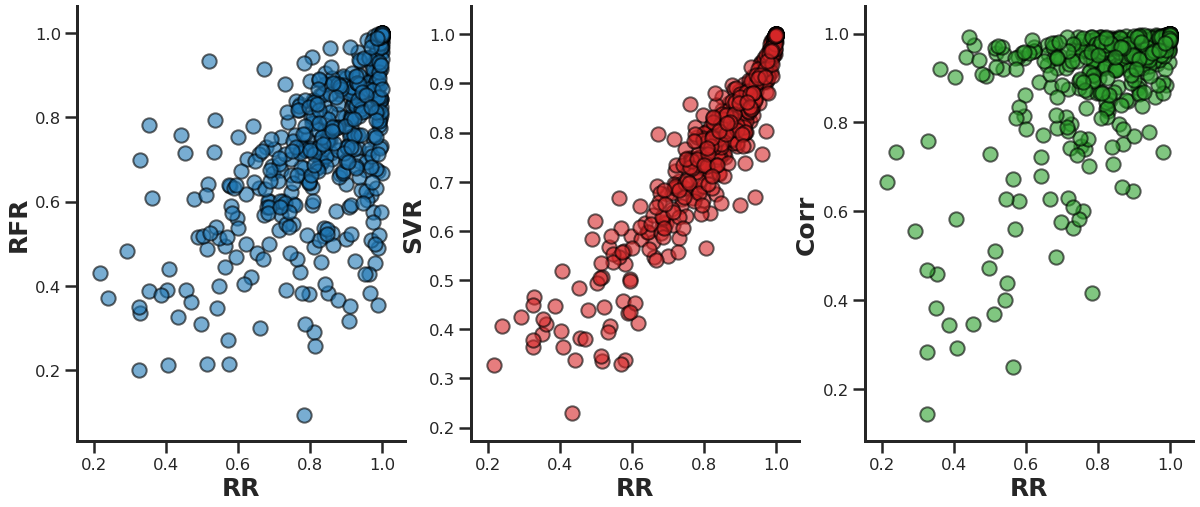

In [16]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.scatter(AUROC_ridge, AUROC_rf, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_xlabel('RR', fontsize=fontsize_xylabels-5, fontweight='bold')
ax1.set_ylabel('RFR', fontsize=fontsize_xylabels-5, fontweight='bold')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)

ax2.scatter(AUROC_ridge, AUROC_svm, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_xlabel('RR', fontsize=fontsize_xylabels-5, fontweight='bold')
ax2.set_ylabel('SVR', fontsize=fontsize_xylabels-5, fontweight='bold')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)

ax3.scatter(AUROC_ridge, AUROC_corr, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_xlabel('RR', fontsize=fontsize_xylabels-5, fontweight='bold')
ax3.set_ylabel('Corr', fontsize=fontsize_xylabels-5, fontweight='bold')

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(3)
ax3.spines['left'].set_linewidth(3)

#plt.savefig('new_figs/scatter_auroc.png')

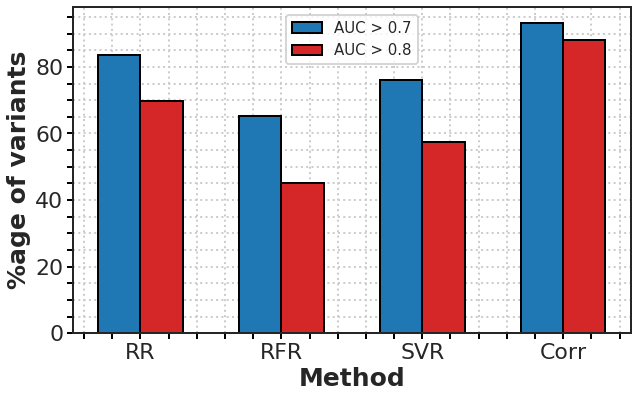

In [24]:
labels = ['RR', 'RFR', 'SVR', 'Corr']

aucs1 = [(AUROC_ridge>0.7).sum()*100/491.0, (AUROC_rf>0.7).sum()*100/491.0, 
         (AUROC_svm>0.7).sum()*100/491.0, (AUROC_corr>0.7).sum()*100/491.0]
aucs2 = [(AUROC_ridge>0.8).sum()*100/491.0, (AUROC_rf>0.8).sum()*100/491.0, 
         (AUROC_svm>0.8).sum()*100/491.0, (AUROC_corr>0.8).sum()*100/491.0]

fig, ax1 = plt.subplots(figsize=(10,6))
x = np.arange(4)
width = 0.3

rects1 = ax1.bar(x - width/2, aucs1, width, label='AUC > 0.7', color='tab:blue', edgecolor='k')
rects2 = ax1.bar(x + width/2, aucs2, width, label='AUC > 0.8', color='tab:red', edgecolor='k')

ax1.set_xlabel('Method', fontsize=fontsize_xylabels-5, fontweight='bold')
ax1.set_ylabel('%age of variants', fontsize=fontsize_xylabels-5, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=15)

ax1.tick_params(labelsize=fontsize_ticks-3)
ax1.legend(fontsize=15)

ax1.grid(True, linestyle=':', which='both')
ax1.minorticks_on()

ax1.tick_params(which='both', width=2, length = 6, color='black' )

ax1.spines['top'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
#plt.savefig('new_figs/fig3A.png',bbox_inches = 'tight')

In [31]:
IMP_rf = files['IMP_rf'].mean(axis=2)
IMP_corr = files['IMP_corr'].mean(axis=2)
IMP_ridge = files['IMP_ridge'].mean(axis=2)
IMP_svm = files['IMP_svm'].mean(axis=2)

In [32]:
IMP_rf = np.delete(IMP_rf,idx,0)
IMP_corr = np.delete(IMP_corr,idx,0)
IMP_ridge = np.delete(IMP_ridge,idx,0)
IMP_svm = np.delete(IMP_svm,idx,0)

In [20]:
percent_rf = list()
percent_ridge = list()
percent_svm = list()
percent_corr = list()

for i in tqdm_notebook(range(IMP_rf.shape[0])):
    percent_rf.append(np.where(-np.sort(-IMP_rf[i,:]).cumsum()>=0.50)[0][0]+1)
    percent_ridge.append(np.where(-np.sort(-(np.abs(IMP_ridge[i,:])
                                                   /np.sum(np.abs(IMP_ridge[i,:])))).cumsum()>=0.50)[0][0]+1)
    percent_corr.append(np.where(-np.sort(-(np.abs(IMP_corr[i,:])
                                                   /np.sum(np.abs(IMP_corr[i,:])))).cumsum()>=0.50)[0][0]+1)
    percent_svm.append(np.where(-np.sort(-(np.abs(IMP_svm[i,:])
                                                   /np.sum(np.abs(IMP_svm[i,:])))).cumsum()>=0.50)[0][0]+1)

/home/ammar/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# RMSE vs Feature contribution

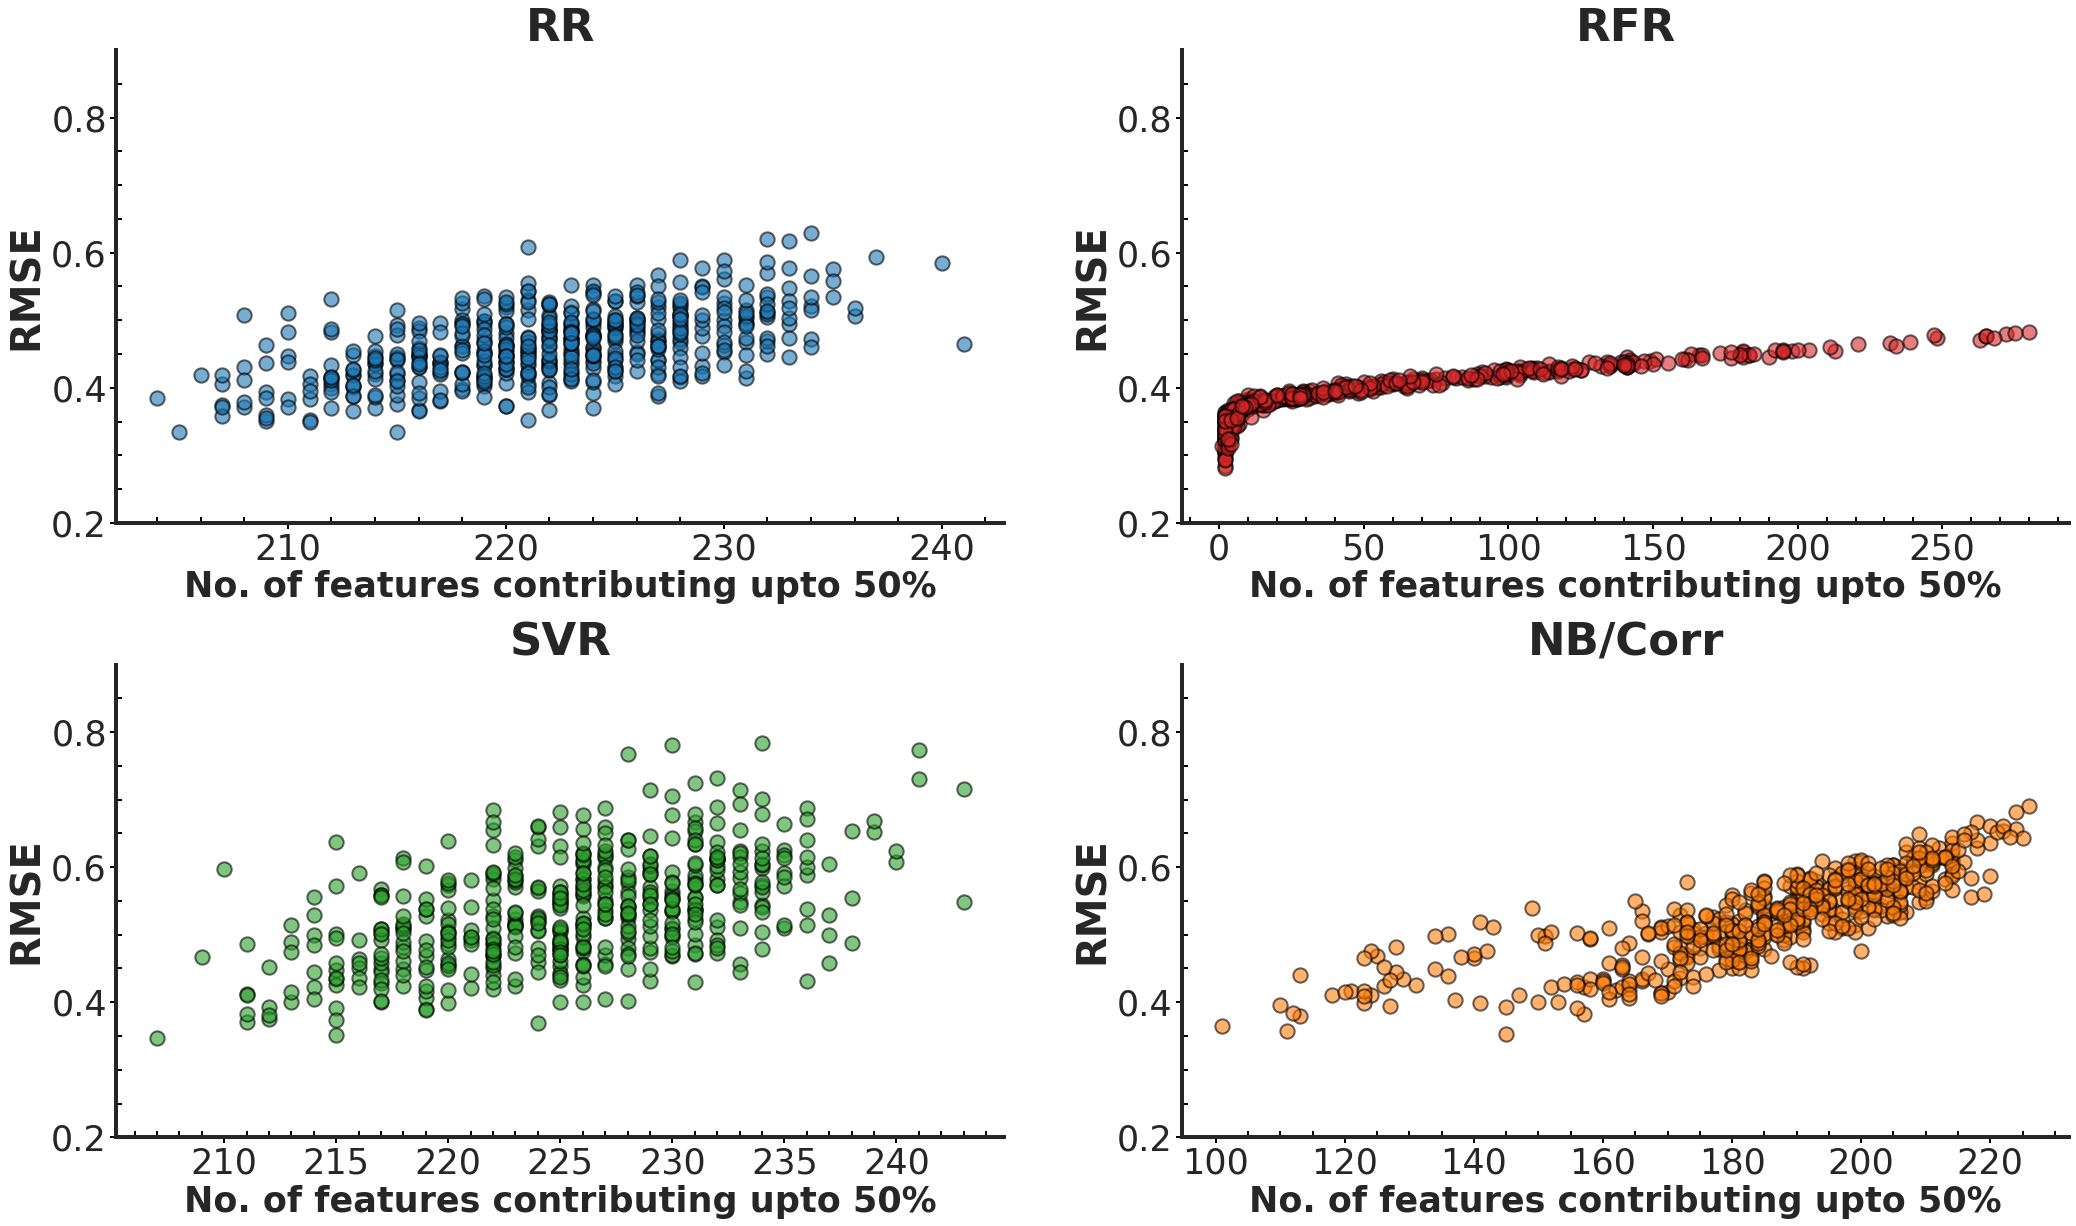

In [21]:
fig, axs = plt.subplots(2,2, figsize=(35,20))


ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim([0.2, 0.9])
    #ax.set_xlim([0, 15])
    ax.tick_params(which='minor', width=2, length = 6, color='black', direction='in')
    ax.tick_params(which='major', width=2, length = 6, color='black')
    #ax.grid(True, linestyle=':', which='both')
    ax.minorticks_on()
    ax.set_xlabel('No. of features contributing upto 50%', fontsize=fontsize_xylabels+5, fontweight='bold')
    ax.set_ylabel('RMSE', fontsize=fontsize_xylabels+5+5, fontweight='bold')
    ax.tick_params(labelsize=fontsize_ticks+5+5)

ax1.scatter(percent_ridge, SCORES_ridge, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_title('RR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)

ax2.scatter(percent_rf, SCORES_rf, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_title('RFR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)

ax3.scatter(percent_svm, SCORES_svm, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_title('SVR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(4)
ax3.spines['left'].set_linewidth(4)


ax4.scatter(percent_corr, SCORES_nb, color='tab:orange', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax4.set_title('NB/Corr', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_linewidth(4)
ax4.spines['left'].set_linewidth(4)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.30)

#plt.savefig('new_figs/fig2A.png')

# RMSE vs True targets

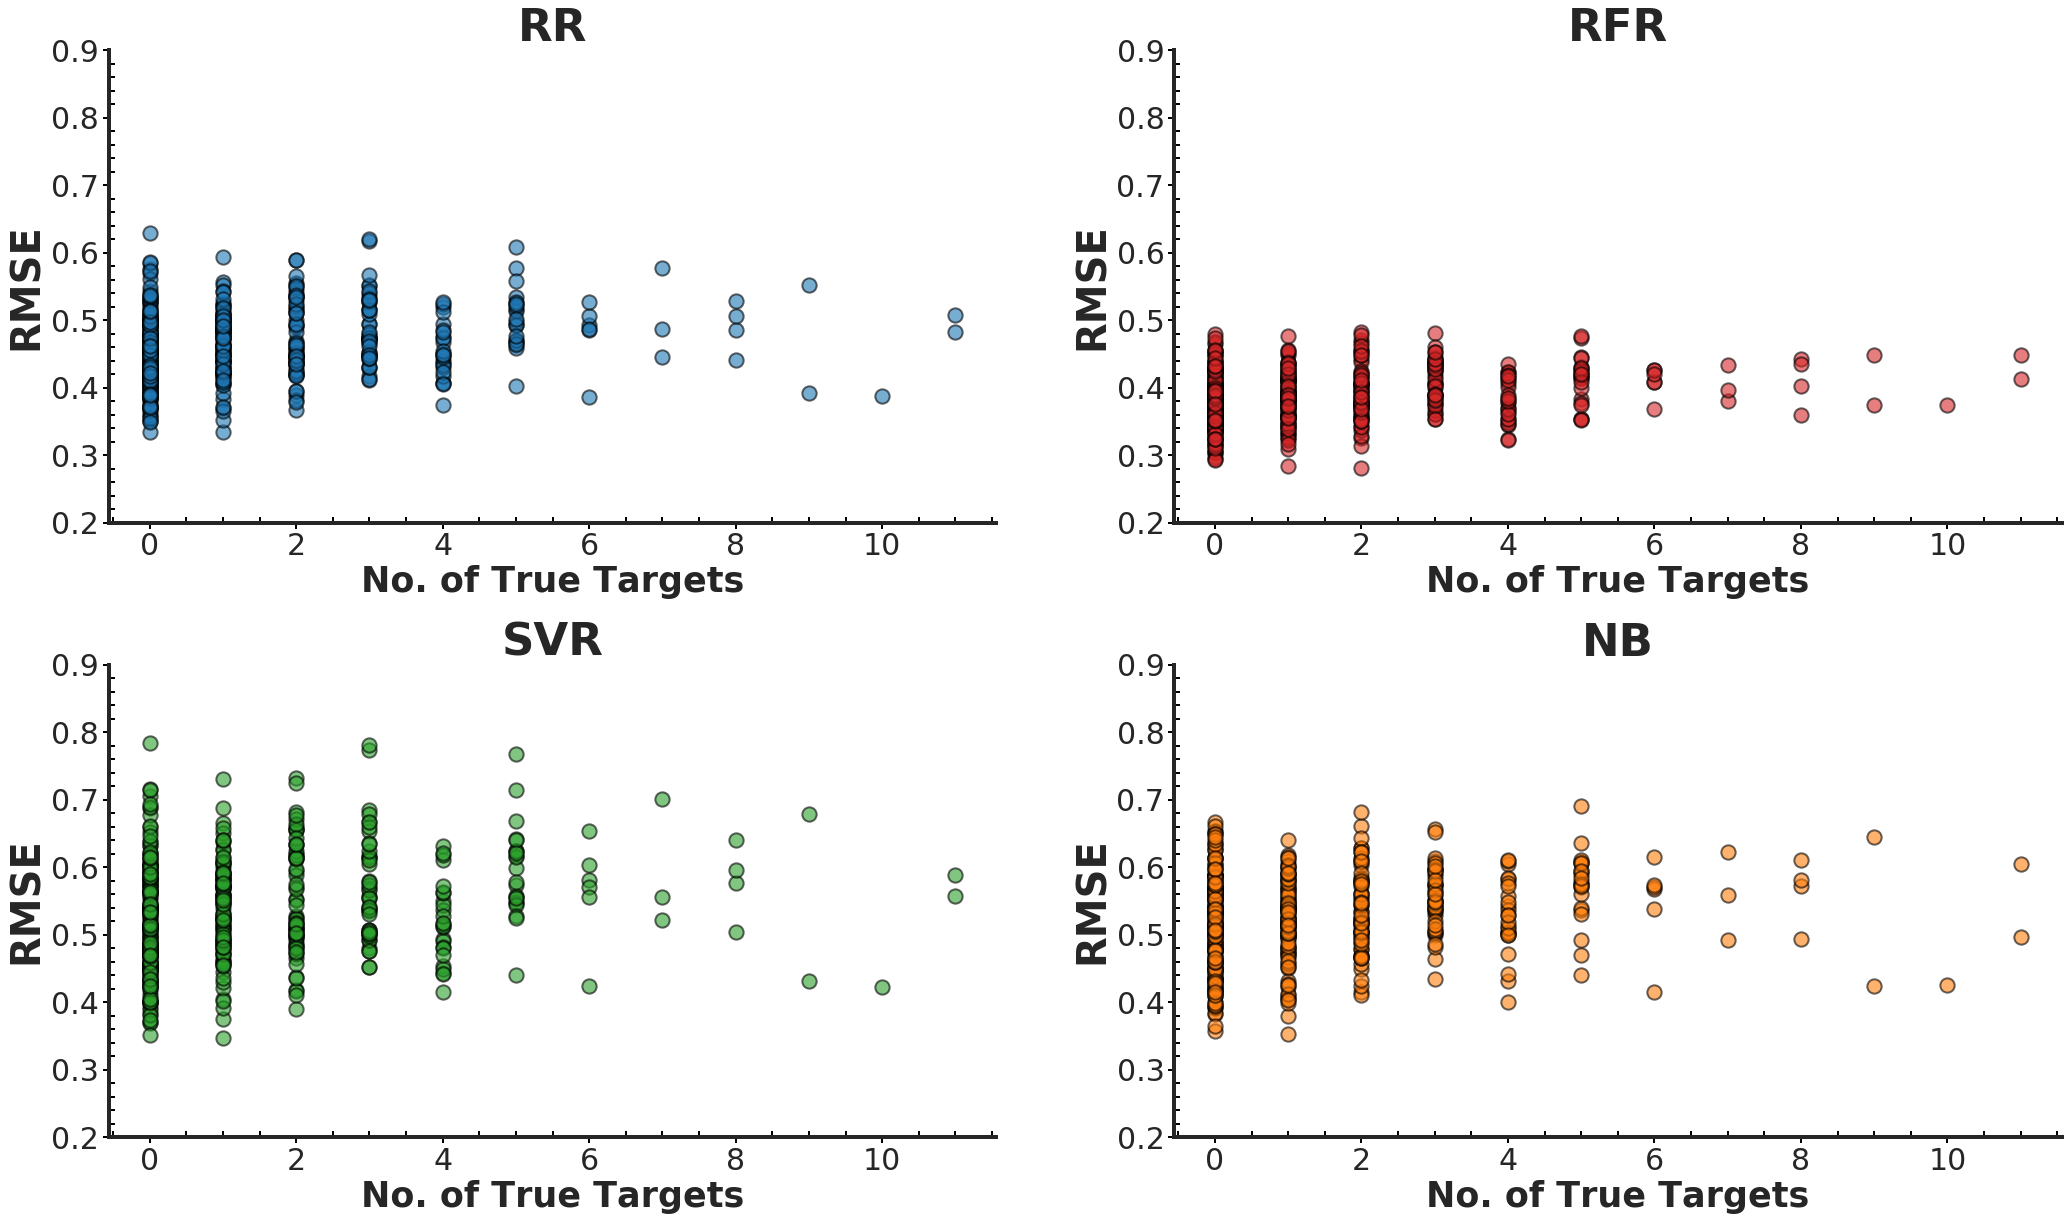

In [22]:
fig, axs = plt.subplots(2,2, figsize=(35,20))


ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim([0.2, 0.9])
    #ax.set_xlim([0, 15])
    ax.tick_params(which='minor', width=2, length = 6, color='black', direction='in')
    ax.tick_params(which='major', width=2, length = 6, color='black')
    #ax.grid(True, linestyle=':', which='both')
    ax.minorticks_on()
    ax.set_xlabel('No. of True Targets', fontsize=fontsize_xylabels+5, fontweight='bold')
    ax.set_ylabel('RMSE', fontsize=fontsize_xylabels+5+5, fontweight='bold')
    ax.tick_params(labelsize=fontsize_ticks+5)

ax1.scatter(true_targets, SCORES_ridge, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_title('RR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)

ax2.scatter(true_targets, SCORES_rf, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_title('RFR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)

ax3.scatter(true_targets, SCORES_svm, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_title('SVR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(4)
ax3.spines['left'].set_linewidth(4)


ax4.scatter(true_targets, SCORES_nb, color='tab:orange', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax4.set_title('NB', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_linewidth(4)
ax4.spines['left'].set_linewidth(4)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.30)

#plt.savefig('new_figs/fig2B.png')

# RMSE vs class imbalance

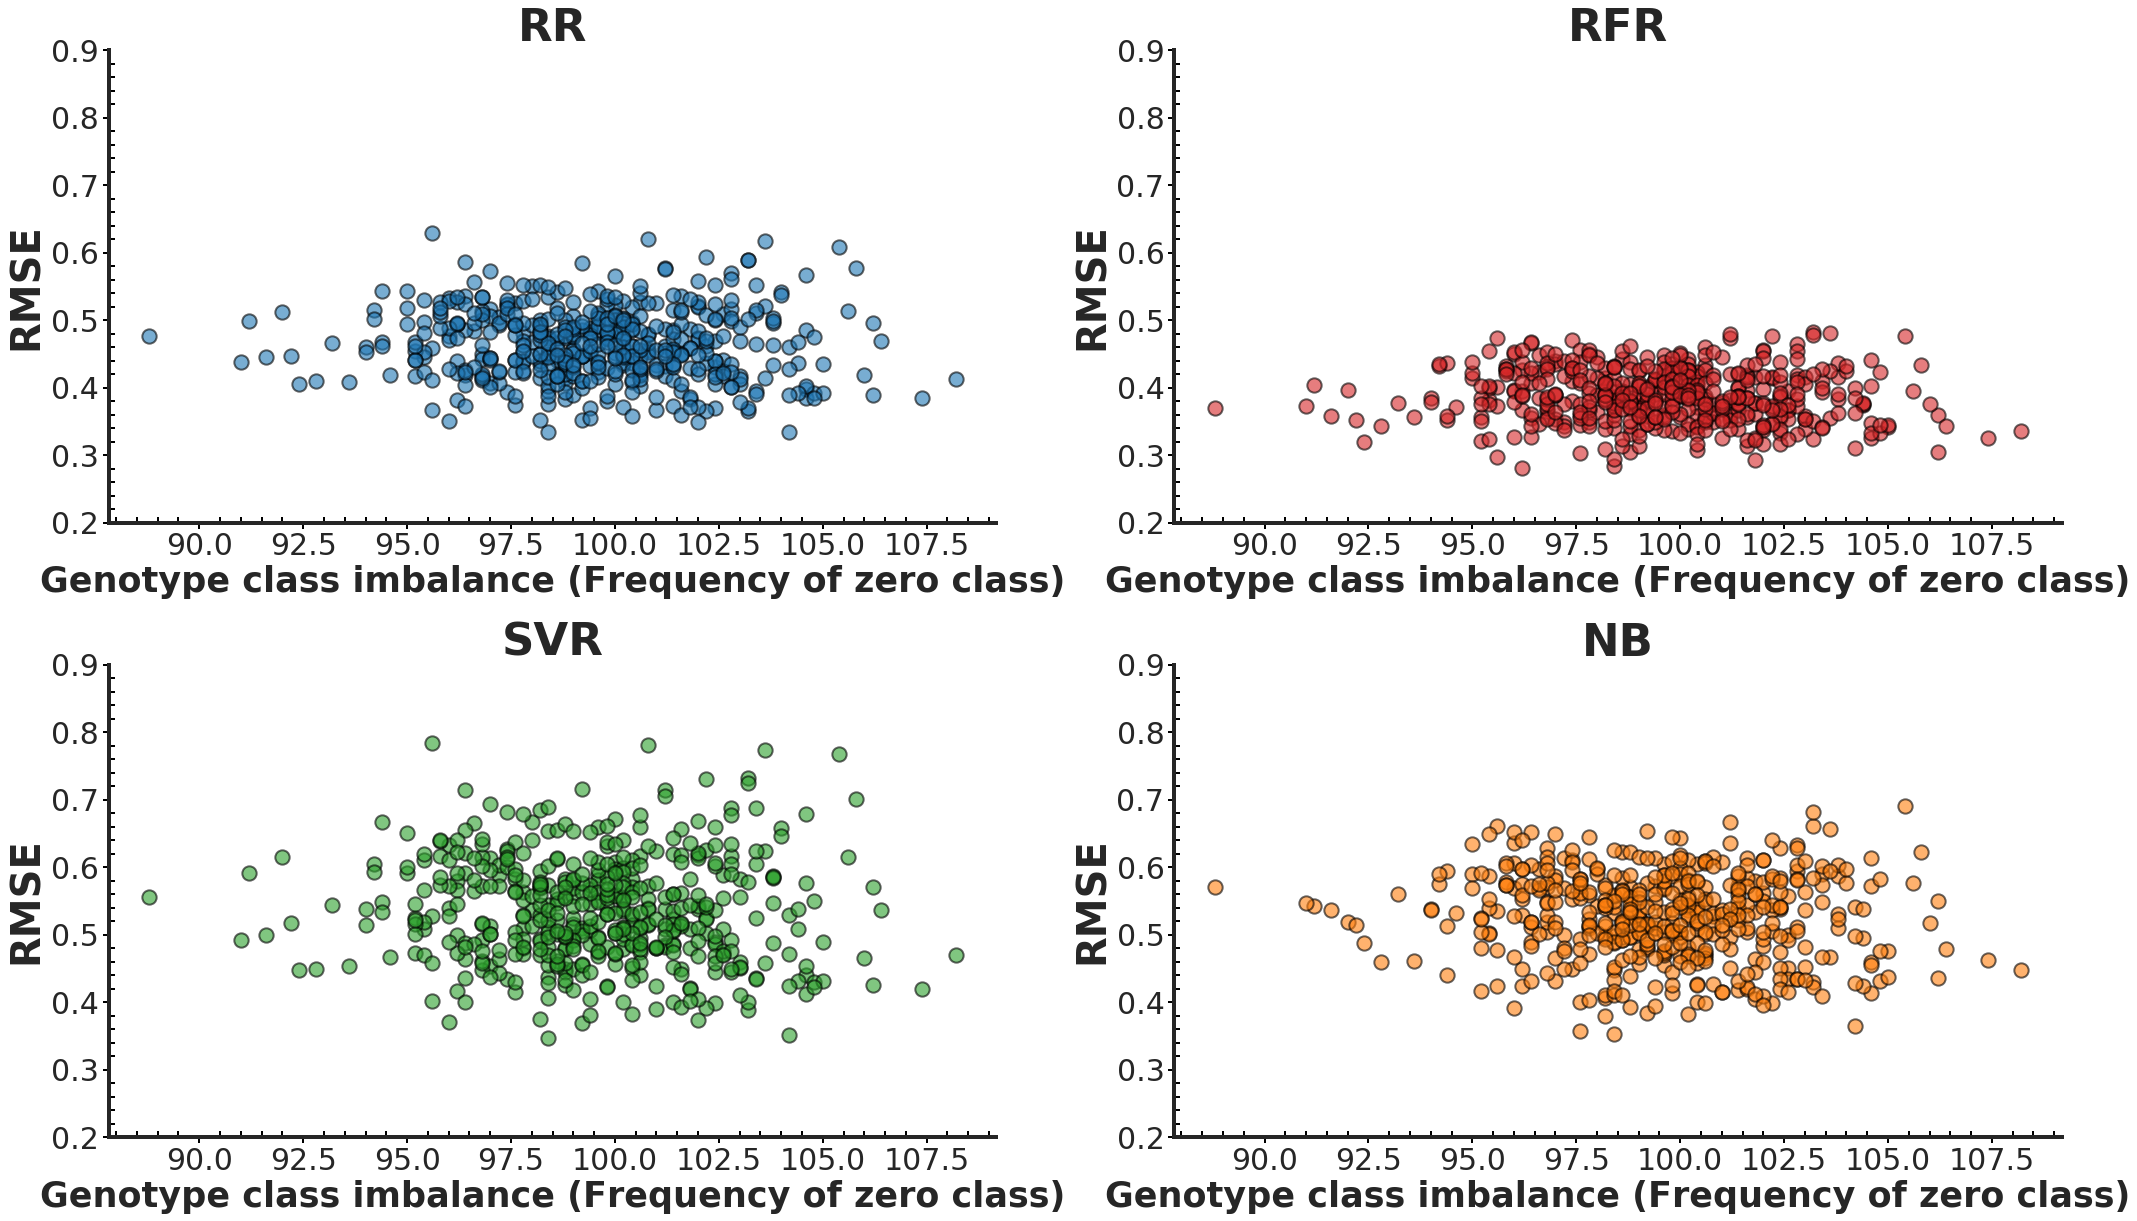

In [23]:
fig, axs = plt.subplots(2,2, figsize=(35,20))


ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim([0.2, 0.9])
    #ax.set_xlim([0, 15])
    ax.tick_params(which='minor', width=2, length = 6, color='black', direction='in')
    ax.tick_params(which='major', width=2, length = 6, color='black')
    #ax.grid(True, linestyle=':', which='both')
    ax.minorticks_on()
    ax.set_xlabel('Genotype class imbalance (Frequency of zero class)', fontsize=fontsize_xylabels+5, fontweight='bold')
    ax.set_ylabel('RMSE', fontsize=fontsize_xylabels+5+5, fontweight='bold')
    ax.tick_params(labelsize=fontsize_ticks+5)

ax1.scatter(zero_class, SCORES_ridge, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_title('RR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)

ax2.scatter(zero_class, SCORES_rf, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_title('RFR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)

ax3.scatter(zero_class, SCORES_svm, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_title('SVR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(4)
ax3.spines['left'].set_linewidth(4)


ax4.scatter(zero_class, SCORES_nb, color='tab:orange', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax4.set_title('NB', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_linewidth(4)
ax4.spines['left'].set_linewidth(4)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.30)

#plt.savefig('new_figs/fig2C.png')

# AUROC vs feature contribution

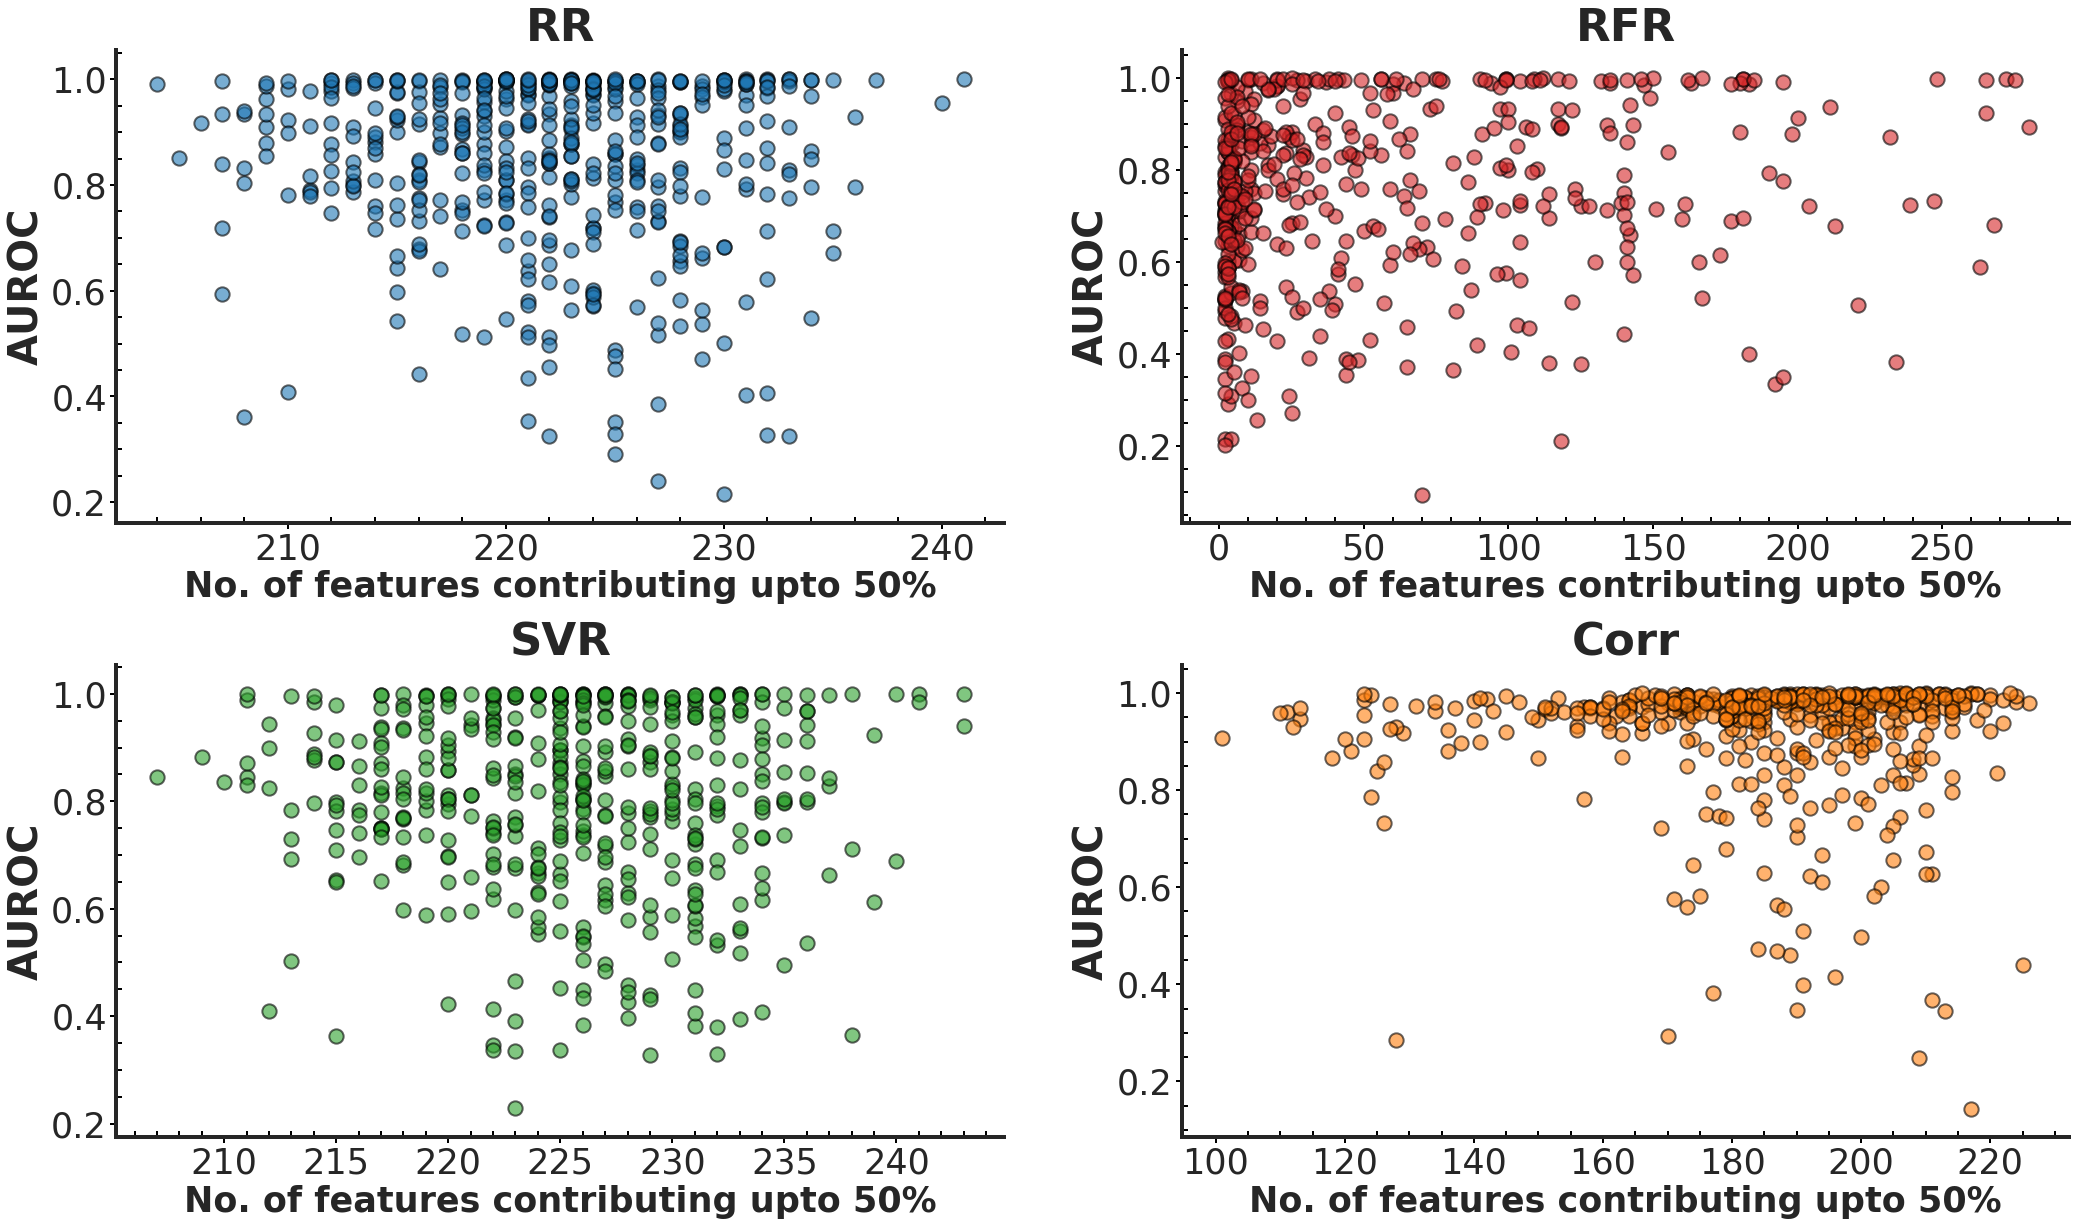

In [27]:
fig, axs = plt.subplots(2,2, figsize=(35,20))


ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

for ax in [ax1,ax2,ax3,ax4]:
    #ax.set_ylim([0.2, 0.9])
    #ax.set_xlim([0, 15])
    ax.tick_params(which='minor', width=2, length = 6, color='black', direction='in')
    ax.tick_params(which='major', width=2, length = 6, color='black')
    #ax.grid(True, linestyle=':', which='both')
    ax.minorticks_on()
    ax.set_xlabel('No. of features contributing upto 50%', fontsize=fontsize_xylabels+5, fontweight='bold')
    ax.set_ylabel('AUROC', fontsize=fontsize_xylabels+5+5, fontweight='bold')
    ax.tick_params(labelsize=fontsize_ticks+5+5)

ax1.scatter(percent_ridge, AUROC_ridge, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_title('RR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)

ax2.scatter(percent_rf, AUROC_rf, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_title('RFR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)

ax3.scatter(percent_svm, AUROC_svm, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_title('SVR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(4)
ax3.spines['left'].set_linewidth(4)


ax4.scatter(percent_corr, AUROC_corr, color='tab:orange', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax4.set_title('Corr', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_linewidth(4)
ax4.spines['left'].set_linewidth(4)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.30)

#plt.savefig('new_figs/fig4A.png')

# AUROC vs True targets

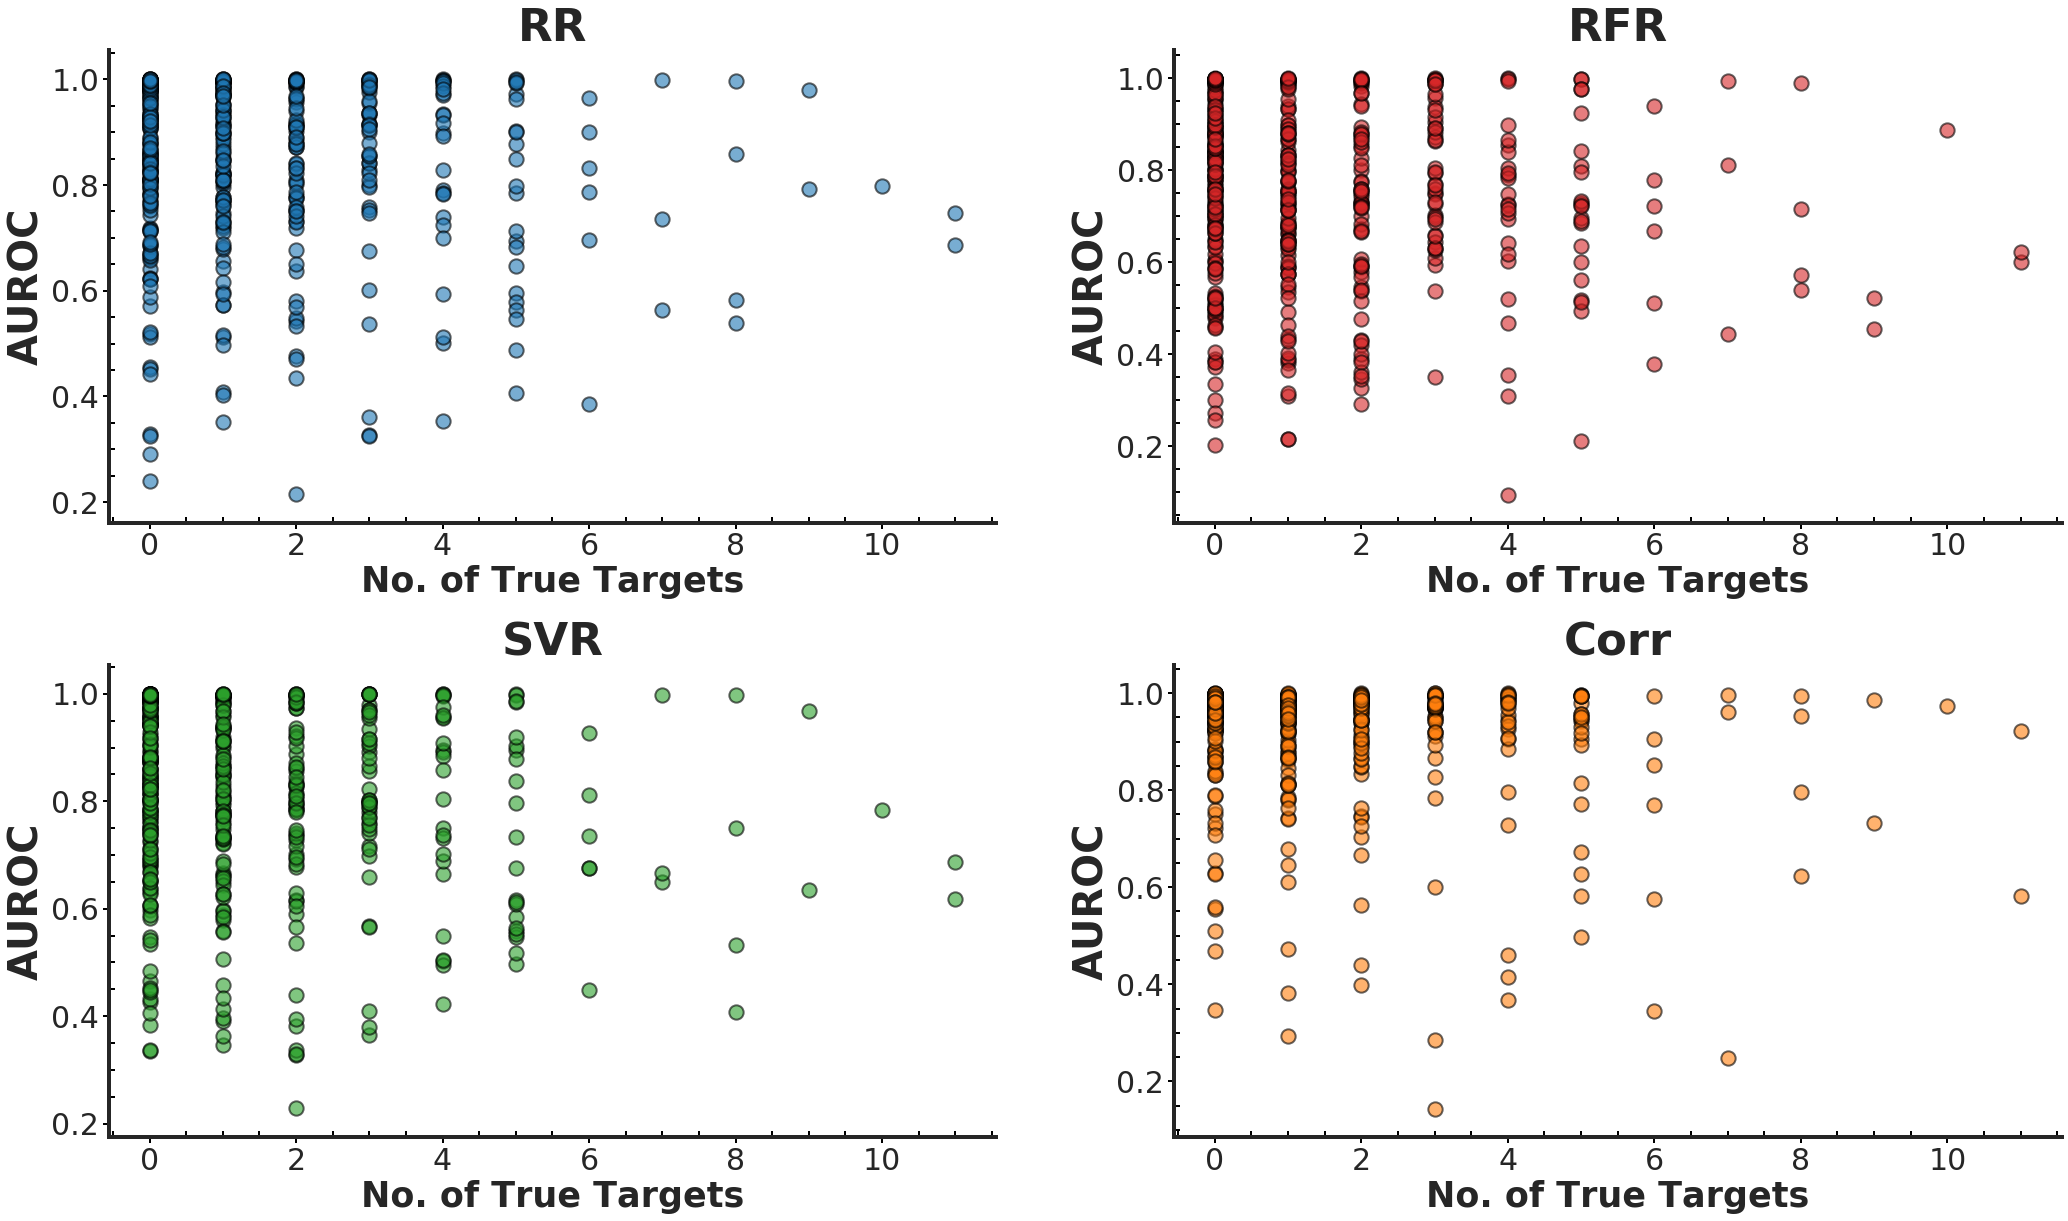

In [28]:
fig, axs = plt.subplots(2,2, figsize=(35,20))


ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

for ax in [ax1,ax2,ax3,ax4]:
    #ax.set_ylim([0.2, 0.9])
    #ax.set_xlim([0, 15])
    ax.tick_params(which='minor', width=2, length = 6, color='black', direction='in')
    ax.tick_params(which='major', width=2, length = 6, color='black')
    #ax.grid(True, linestyle=':', which='both')
    ax.minorticks_on()
    ax.set_xlabel('No. of True Targets', fontsize=fontsize_xylabels+5, fontweight='bold')
    ax.set_ylabel('AUROC', fontsize=fontsize_xylabels+5+5, fontweight='bold')
    ax.tick_params(labelsize=fontsize_ticks+5)

ax1.scatter(true_targets, AUROC_ridge, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_title('RR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)

ax2.scatter(true_targets, AUROC_rf, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_title('RFR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)

ax3.scatter(true_targets, AUROC_svm, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_title('SVR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(4)
ax3.spines['left'].set_linewidth(4)


ax4.scatter(true_targets, AUROC_corr, color='tab:orange', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax4.set_title('Corr', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_linewidth(4)
ax4.spines['left'].set_linewidth(4)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.30)

#plt.savefig('new_figs/fig4B.png')

# AUROC vs class imbalance

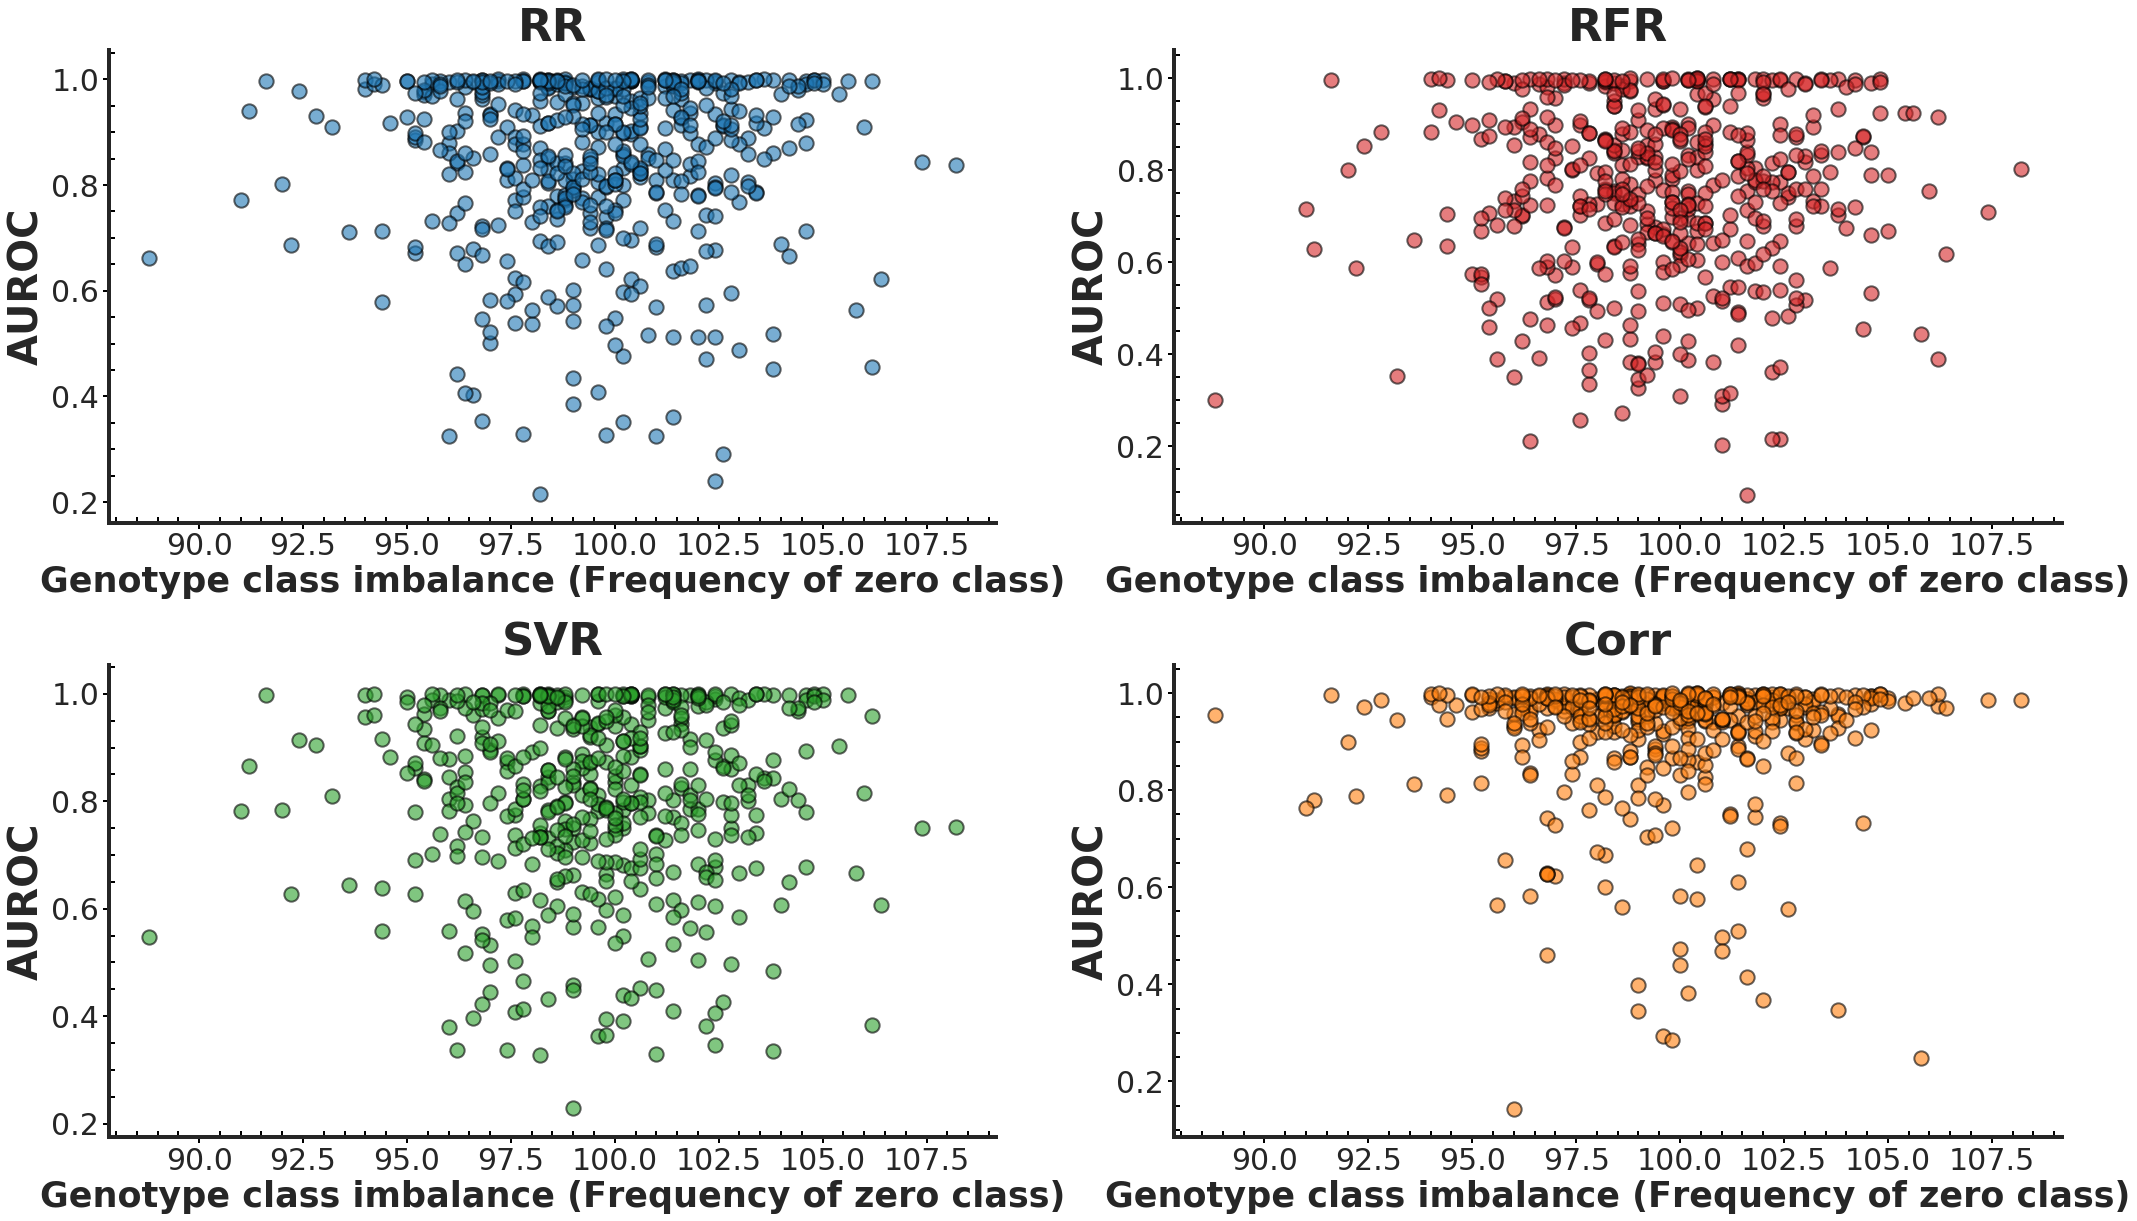

In [29]:
fig, axs = plt.subplots(2,2, figsize=(35,20))


ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

for ax in [ax1,ax2,ax3,ax4]:
    #ax.set_ylim([0.2, 0.9])
    #ax.set_xlim([0, 15])
    ax.tick_params(which='minor', width=2, length = 6, color='black', direction='in')
    ax.tick_params(which='major', width=2, length = 6, color='black')
    #ax.grid(True, linestyle=':', which='both')
    ax.minorticks_on()
    ax.set_xlabel('Genotype class imbalance (Frequency of zero class)', fontsize=fontsize_xylabels+5, fontweight='bold')
    ax.set_ylabel('AUROC', fontsize=fontsize_xylabels+5+5, fontweight='bold')
    ax.tick_params(labelsize=fontsize_ticks+5)

ax1.scatter(zero_class, AUROC_ridge, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_title('RR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)

ax2.scatter(zero_class, AUROC_rf, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_title('RFR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)

ax3.scatter(zero_class, AUROC_svm, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_title('SVR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(4)
ax3.spines['left'].set_linewidth(4)


ax4.scatter(zero_class, AUROC_corr, color='tab:orange', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax4.set_title('Corr', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_linewidth(4)
ax4.spines['left'].set_linewidth(4)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.30)

#plt.savefig('new_figs/fig4C.png')

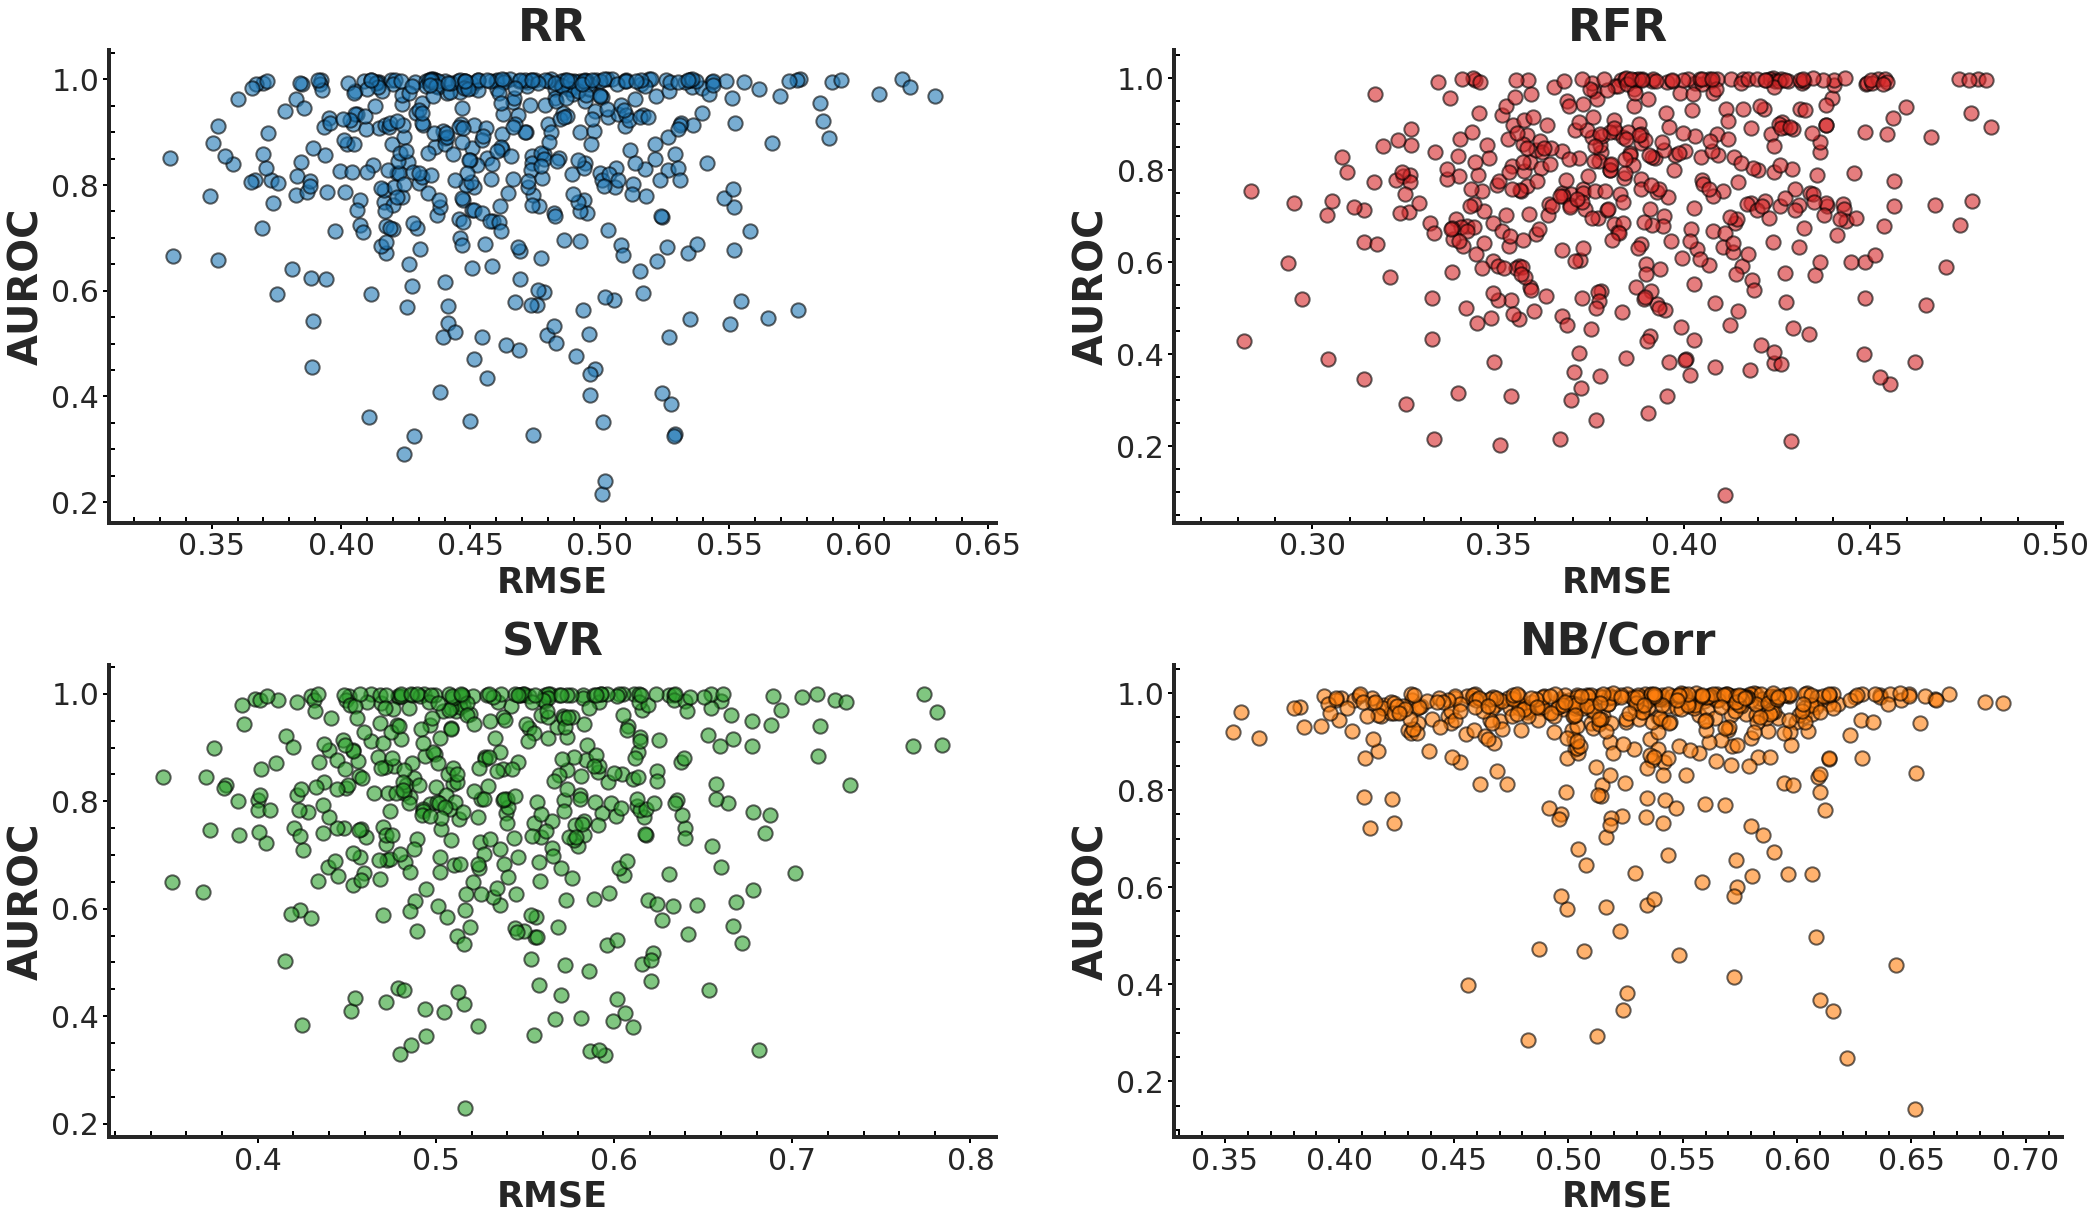

In [30]:
fig, axs = plt.subplots(2,2, figsize=(35,20))


ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

for ax in [ax1,ax2,ax3,ax4]:
    #ax.set_ylim([0.2, 0.9])
    #ax.set_xlim([0, 15])
    ax.tick_params(which='minor', width=2, length = 6, color='black', direction='in')
    ax.tick_params(which='major', width=2, length = 6, color='black')
    #ax.grid(True, linestyle=':', which='both')
    ax.minorticks_on()
    ax.set_xlabel('RMSE', fontsize=fontsize_xylabels+5, fontweight='bold')
    ax.set_ylabel('AUROC', fontsize=fontsize_xylabels+5+5, fontweight='bold')
    ax.tick_params(labelsize=fontsize_ticks+5)

ax1.scatter(SCORES_ridge, AUROC_ridge, color='tab:blue', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax1.set_title('RR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)

ax2.scatter(SCORES_rf, AUROC_rf, color='tab:red', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax2.set_title('RFR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)

ax3.scatter(SCORES_svm, AUROC_svm, color='tab:green', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax3.set_title('SVR', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_linewidth(4)
ax3.spines['left'].set_linewidth(4)


ax4.scatter(SCORES_nb, AUROC_corr, color='tab:orange', marker='o', s=s_size+5, alpha=0.6, edgecolor='k')
ax4.set_title('NB/Corr', fontsize=fontsize_xylabels+10+5, fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_linewidth(4)
ax4.spines['left'].set_linewidth(4)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.30)

#plt.savefig('new_figs/fig5.png')